In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
from numpy import random
import scipy.stats as scipy
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import squarify 

In [2]:
train = pd.read_csv("shop.tsv",sep='\t')

In [3]:
dt = pd.concat([train],ignore_index=True)

In [4]:
dt

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity
...,...,...,...,...,...,...,...,...
1482530,1482530,Free People Inspired Dress,2,Women/Dresses/Mid-Calf,Free People,20.0,1,"Lace, says size small but fits medium perfectl..."
1482531,1482531,Little mermaid handmade dress,2,Kids/Girls 2T-5T/Dresses,Disney,14.0,0,Little mermaid handmade dress never worn size 2t
1482532,1482532,21 day fix containers and eating plan,2,Sports & Outdoors/Exercise/Fitness accessories,NaN,12.0,0,"Used once or twice, still in great shape."
1482533,1482533,World markets lanterns,3,Home/Home Décor/Home Décor Accents,NaN,45.0,1,There is 2 of each one that you see! So 2 red ...


In [5]:
dt.describe()

,train_id,item_condition_id,price,shipping
count,1.482535e+06,1.482535e+06,1.482535e+06,1.482535e+06
mean,7.412670e+05,1.907380e+00,2.673752e+01,4.472744e-01
std,4.279711e+05,9.031586e-01,3.858607e+01,4.972124e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.706335e+05,1.000000e+00,1.000000e+01,0.000000e+00
50%,7.412670e+05,2.000000e+00,1.700000e+01,0.000000e+00
75%,1.111900e+06,3.000000e+00,2.900000e+01,1.000000e+00
max,1.482534e+06,5.000000e+00,2.009000e+03,1.000000e+00


In [7]:
#Satır ve sutun sayısı 
train.shape

(1482535, 8)

In [8]:
train.info

<bound method DataFrame.info of          train_id                                   name  item_condition_id  \
0               0    MLB Cincinnati Reds T Shirt Size XL                  3   
1               1       Razer BlackWidow Chroma Keyboard                  3   
2               2                         AVA-VIV Blouse                  1   
3               3                  Leather Horse Statues                  1   
4               4                   24K GOLD plated rose                  1   
...           ...                                    ...                ...   
1482530   1482530             Free People Inspired Dress                  2   
1482531   1482531          Little mermaid handmade dress                  2   
1482532   1482532  21 day fix containers and eating plan                  2   
1482533   1482533                 World markets lanterns                  3   
1482534   1482534          Brand new lux de ville wallet                  1   

                   

In [6]:
#Hangi sütunlarda kaç adet boş var? Örneğin 6327 üründe category_name girilmemiş.
train.isnull().sum()

train_id                  0
name                      0
item_condition_id         0
category_name          6327
brand_name           632682
price                     0
shipping                  0
item_description          4
dtype: int64

In [11]:
train.head(5)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [13]:
#1482535 adet ürün içinde benzer isimlerde ürünler varmış.
essizisim = train.name.value_counts().size
print ('Kac farkli isim var : ', essizisim)

Kac farkli isim var :  1225273


In [16]:
cat_sayisi = train.category_name.value_counts().size
print (cat_sayisi,  'adet kategoriye sahibiz.')

1287 adet kategoriye sahibiz.


In [18]:
train['category_name'].value_counts()[:7]

Women/Athletic Apparel/Pants, Tights, Leggings                 60177
Women/Tops & Blouses/T-Shirts                                  46380
Beauty/Makeup/Face                                             34335
Beauty/Makeup/Lips                                             29910
Electronics/Video Games & Consoles/Games                       26557
Beauty/Makeup/Eyes                                             25215
Electronics/Cell Phones & Accessories/Cases, Covers & Skins    24676
Name: category_name, dtype: int64

Text(0, 0.5, '')

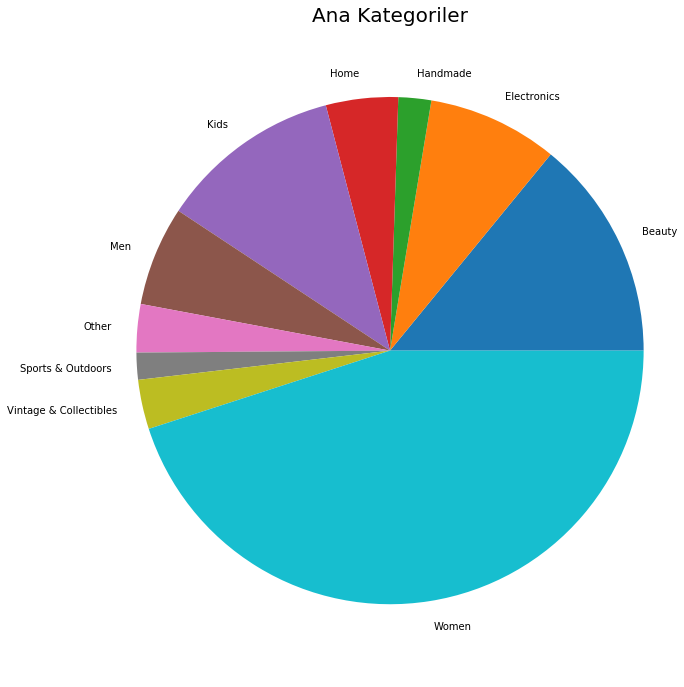

In [7]:
#Category_name adı altında ana kategori/ilk alt kategori/ikinci alt kategori bulunur.
train['cat1'] = train.category_name.str.extract('([^/]+)/[^/]+/[^/]+')
train['cat2'] = train.category_name.str.extract('([^/]+/[^/]+)/[^/]+')

plt.figure(figsize = (10,12))
train.name.groupby(train.cat1).count().plot(kind = 'pie')
plt.title ('Ana Kategoriler', fontsize = 20)
plt.axis('equal')
plt.ylabel('')

In [9]:
train['cat1'].value_counts()[:12]

Women                     664385
Beauty                    207828
Kids                      171689
Electronics               122690
Men                        93680
Home                       67871
Vintage & Collectibles     46530
Other                      45351
Handmade                   30842
Sports & Outdoors          25342
Name: cat1, dtype: int64

Text(0.5, 0, 'Kategori içerisindeki ürün sayısı')

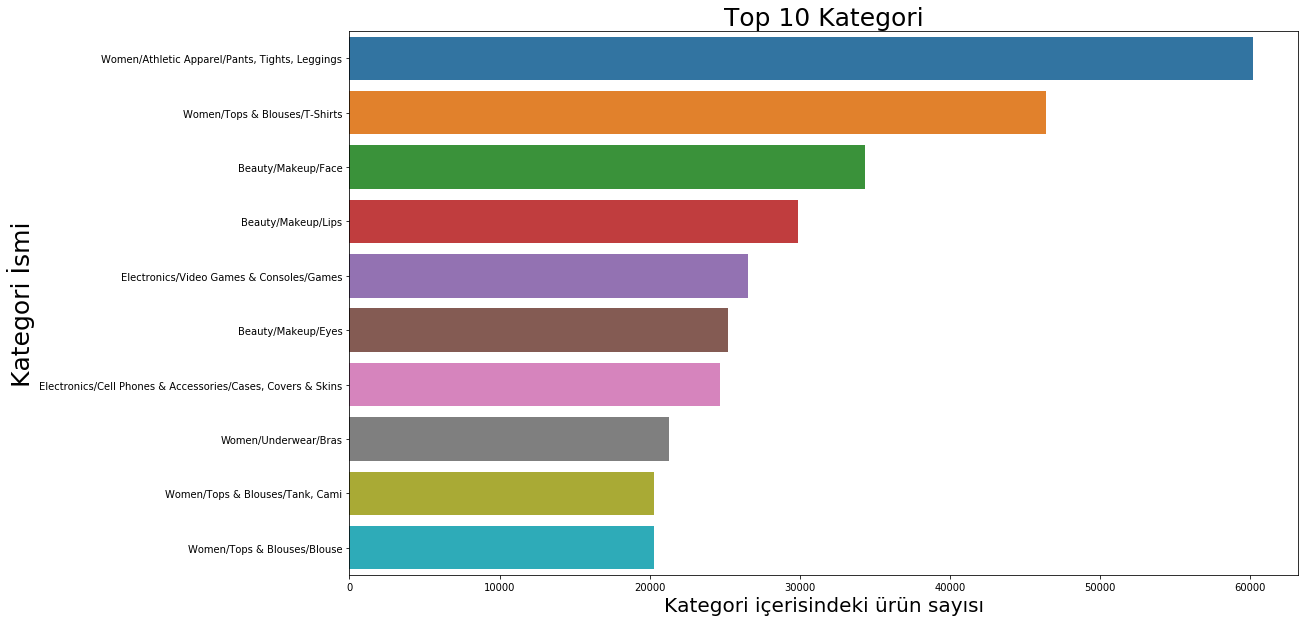

In [46]:
plt.figure(figsize=(17,10))
sns.countplot(y = train.category_name, \
              order = train.category_name.value_counts().iloc[:10].index, \
                                                      orient = 'v')
plt.title('Top 10 Kategori', fontsize = 25)
plt.ylabel('Kategori İsmi', fontsize = 25)
plt.xlabel('Kategori içerisindeki ürün sayısı', fontsize = 20)

(0.0, 100.0, 0.0, 100.0)

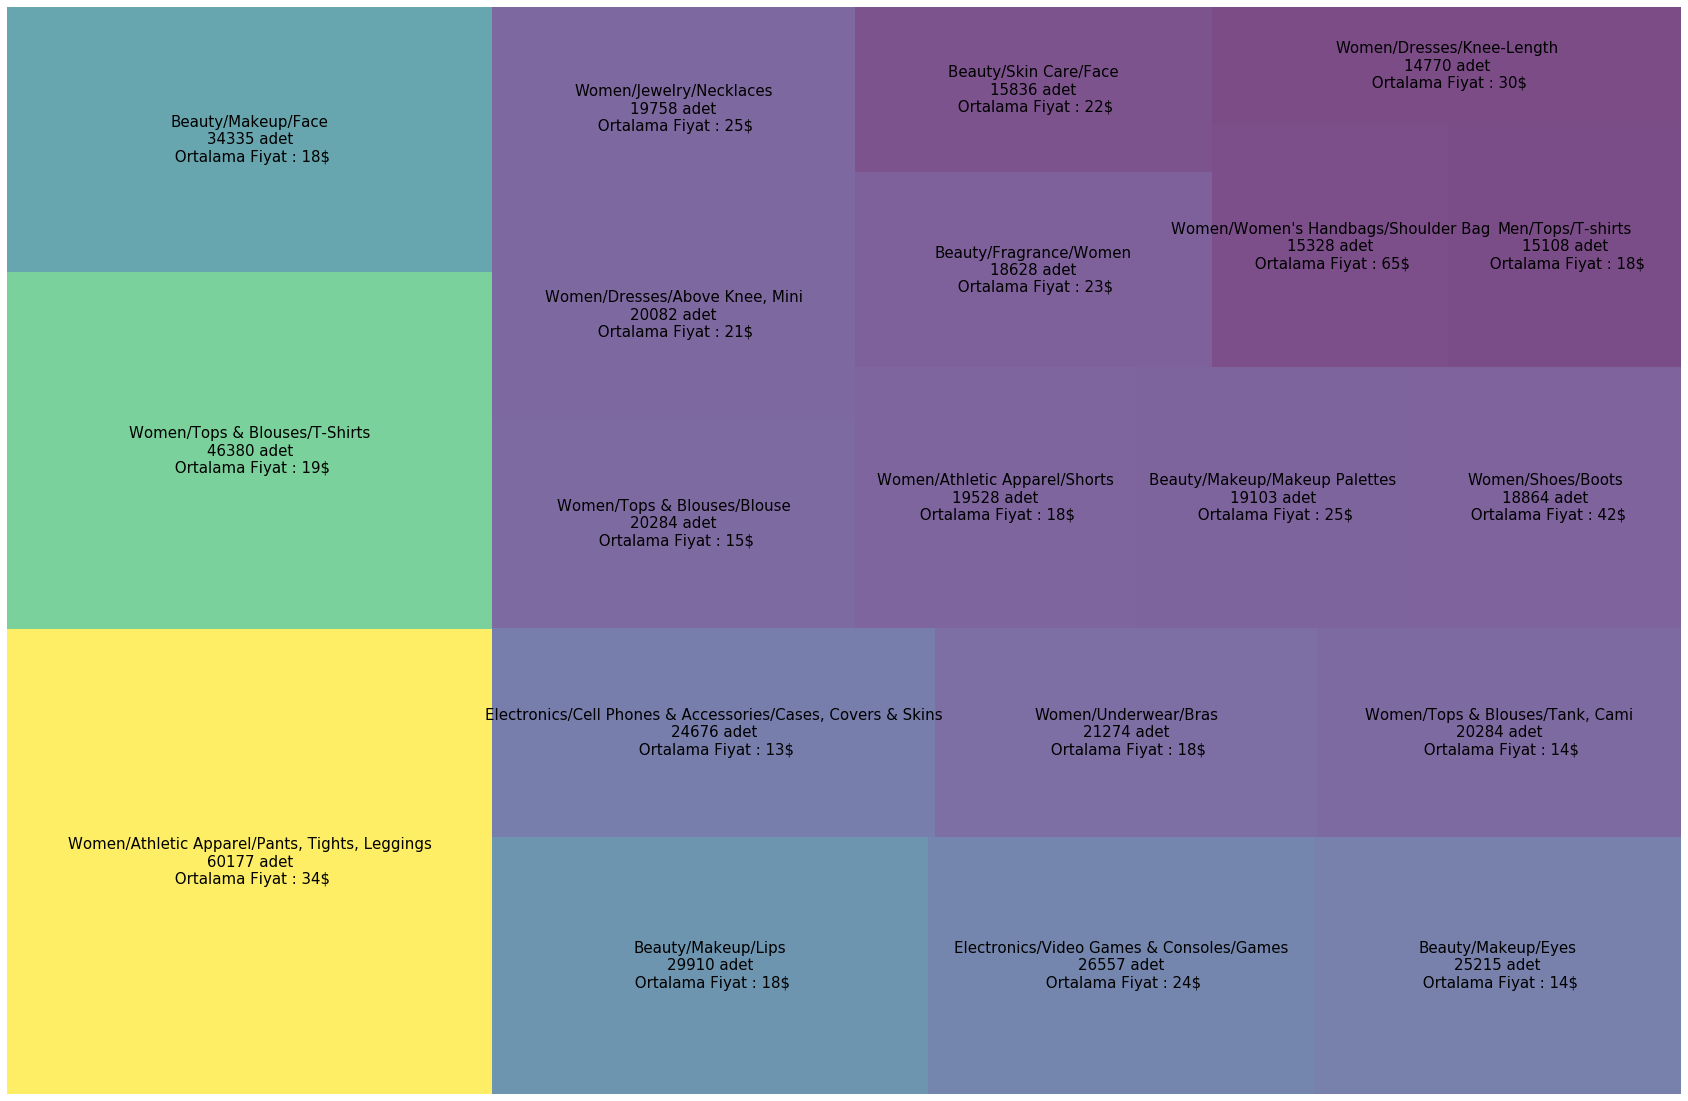

In [48]:
# Her bir kategorinin ne kadar alan kapladığı
cats = pd.DataFrame(train.category_name.value_counts())
cats.reset_index(level = 0, inplace=True)
cats = cats.sort_values(by='category_name', ascending = False).head(20)
cats.columns =('category_name', 'size')

# Kategori Fiyatları
group = train.groupby(train.category_name)
mean_price = group.price.mean()
mean_price = pd.DataFrame(mean_price)
mean_price.reset_index(level = 0, inplace=True)

# Birleştirme
cats = pd.merge(cats, mean_price, how='left', on = 'category_name')

# Renk Ayarları
cmap = matplotlib.cm.viridis
mini=min(cats['size'])
maxi=max(cats['size'])
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in cats['size']]

# Etiket Ayarları
labels = ["%s\n%d adet\n Ortalama Fiyat : %d$" % (label) \
          for label in zip(cats['category_name'], cats['size'], cats['price'])]


plt.figure(figsize=(30,20))
plt.rc('font', size=15)
squarify.plot(sizes = cats['size'], label = labels, alpha = .7, color=colors)
plt.axis('off')

Text(0.5, 0, 'Ortalama Fiyat($)')

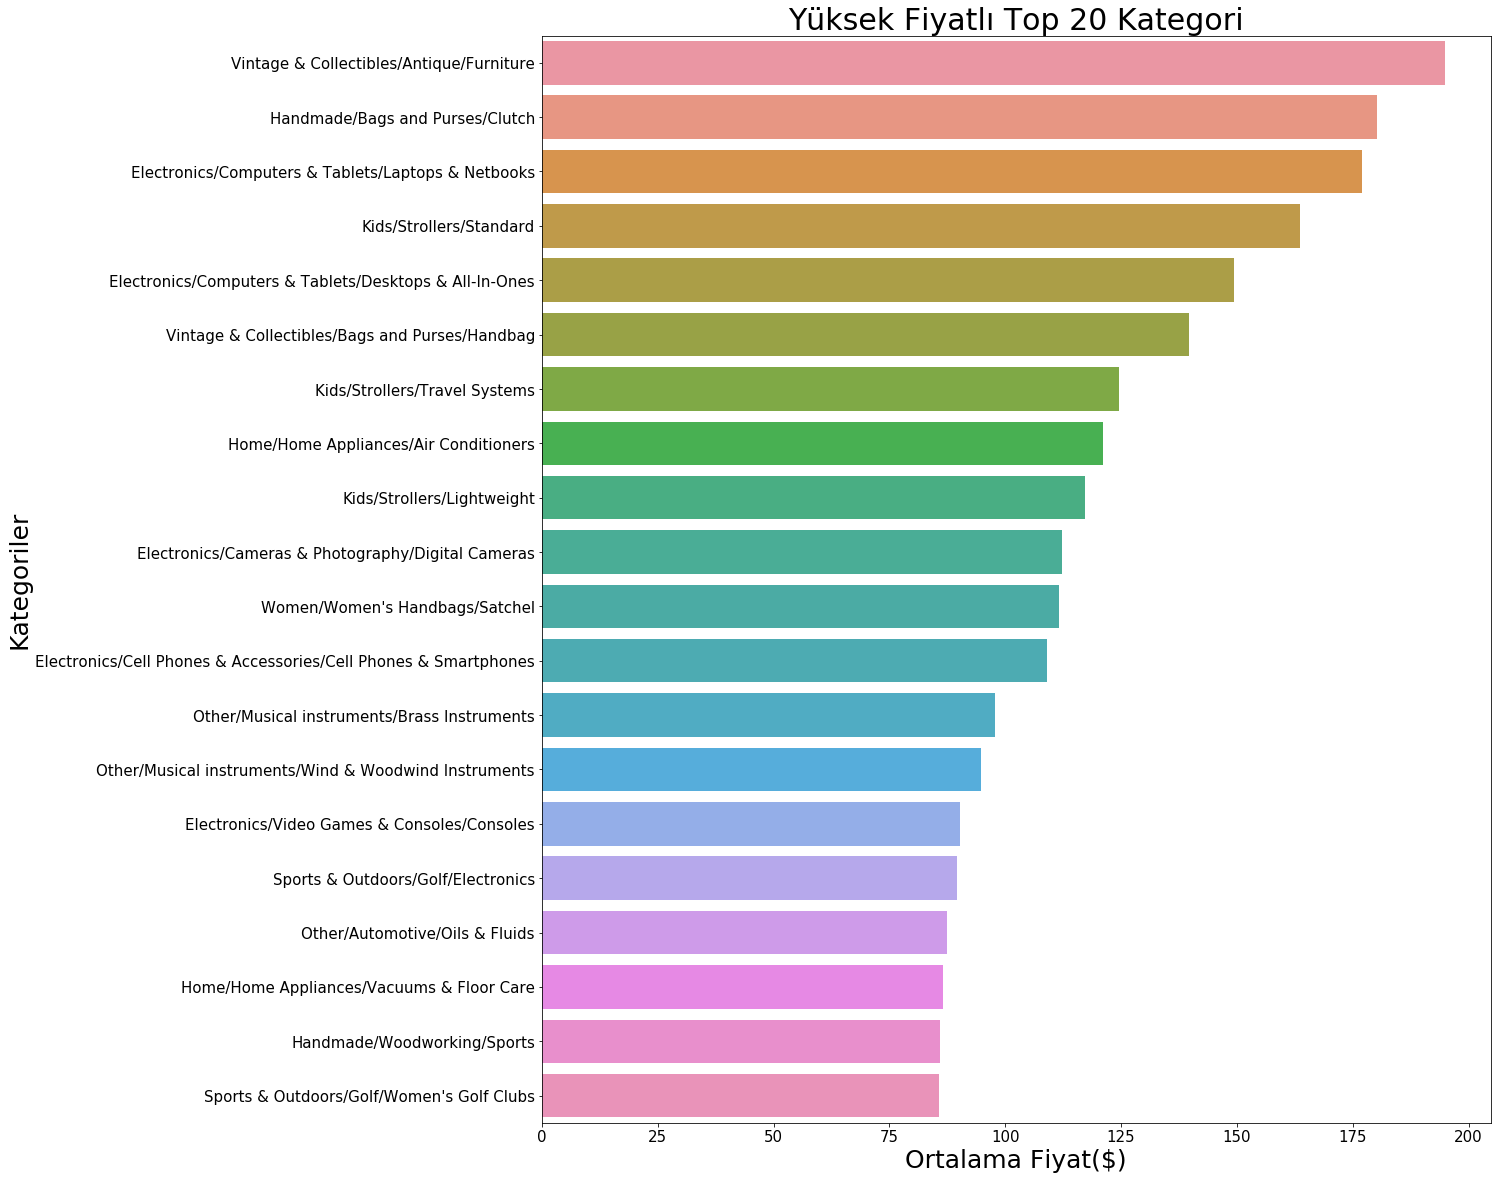

In [50]:
group = train.groupby(train.category_name)
mean_price = pd.DataFrame(group.price.mean())
mean_price = mean_price.sort_values(by='price', ascending = False).head(20)
mean_price.reset_index(level = 0, inplace=True)

plt.figure(figsize=(17,20))
sns.barplot(x = 'price', y = 'category_name', data = mean_price, orient = 'h')
plt.title('Yüksek Fiyatlı Top 20 Kategori', fontsize = 30)
plt.ylabel('Kategoriler', fontsize = 25)
plt.xlabel('Ortalama Fiyat($)', fontsize = 25)

Text(0.5, 0, 'Her kategorinin ortalama fiyatı($)')

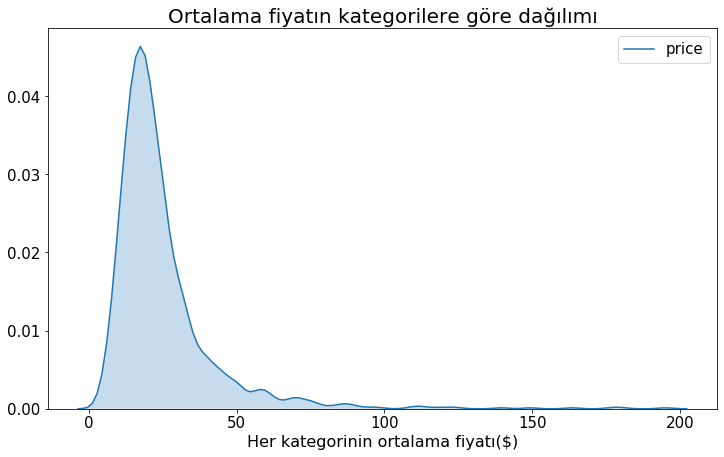

In [52]:
mean_price_2 = pd.DataFrame(group.price.mean())
mean_price_2.reset_index(level = 0, inplace=True)

plt.figure(figsize =(12,7))
sns.kdeplot(mean_price_2.price, shade = True)
plt.title('Ortalama fiyatın kategorilere göre dağılımı', fontsize = 20)
plt.xlabel('Her kategorinin ortalama fiyatı($)', fontsize = 16)

In [53]:
#Çoğu kategorinin ortalama fiyatı 50$'ın aşağısında

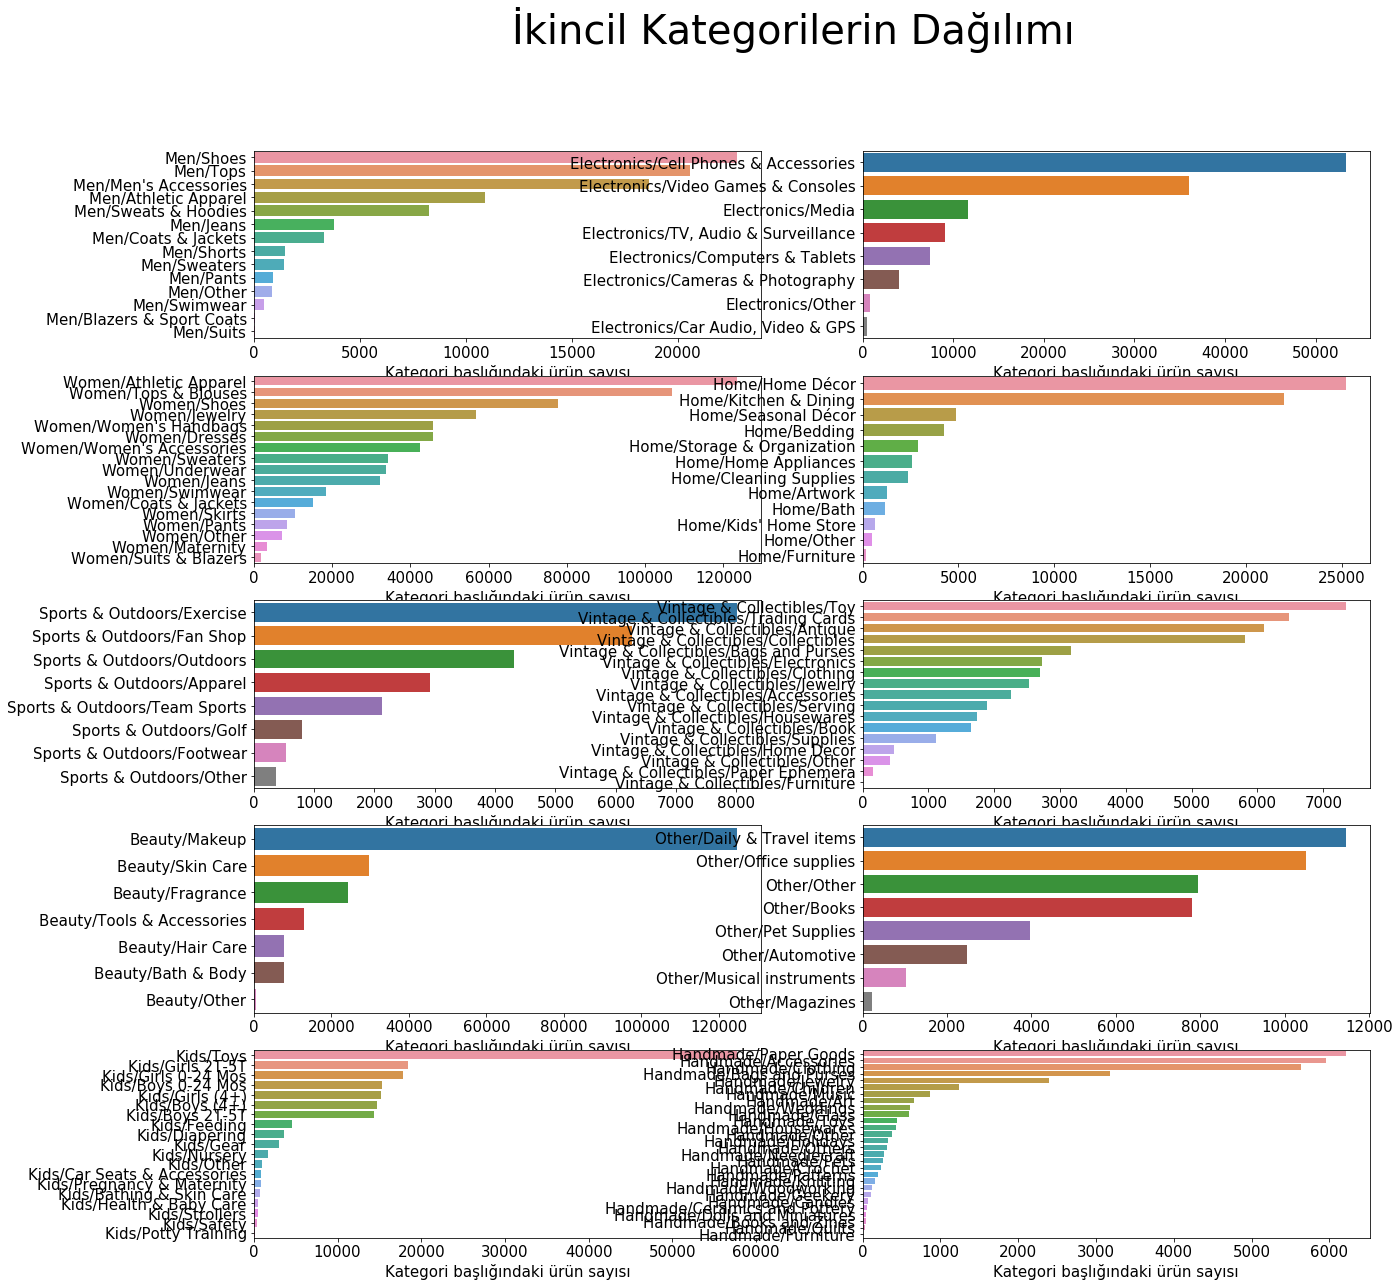

In [55]:
# Ana kategorileri kendi içindeki kategorilere bölüyoruz.
alldf = {}
for col in train.cat1[train.cat1.isnull() == False].unique() :

    temp = train.cat2[train['cat1'] == col]
    temp = pd.DataFrame(temp.value_counts().reset_index())
    
    alldf[col] = temp

# Grafiğe dökme tarafı    
i = 0
fig, axs = plt.subplots(5,2, figsize=(20,20))   
plt.suptitle('İkincil Kategorilerin Dağılımı', fontsize = 40) 

for cat in alldf:
    temp = alldf[cat]
    sns.barplot('cat2', 'index', data = temp, ax = axs.flatten()[i])
    axs.flatten()[i].set_ylabel('')
    axs.flatten()[i].set_xlabel('Kategori başlığındaki ürün sayısı')
    i+=1    

Text(0.5, 0, 'Fiyat($)')

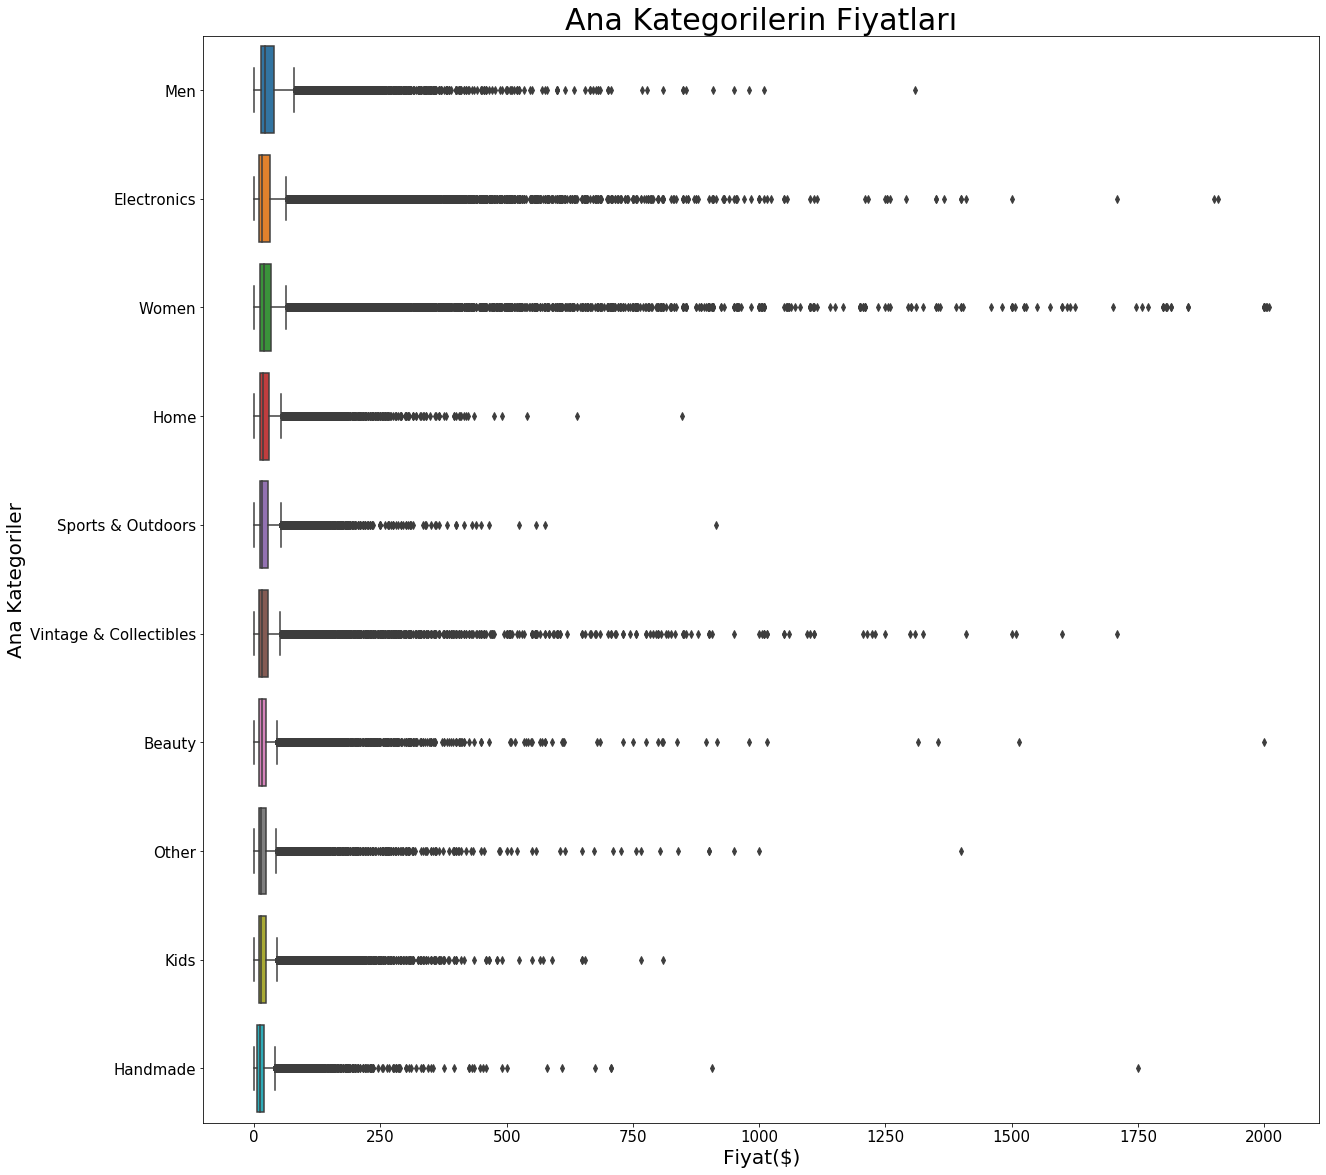

In [56]:
#Kutu grafiği kullanarak ana kategori/fiyat analizi
plt.figure(figsize=(20,20))
sns.boxplot( x = 'price' , y = 'cat1', data = train, orient = 'h')
plt.title('Ana Kategorilerin Fiyatları', fontsize = 30)
plt.ylabel ('Ana Kategoriler', fontsize = 20)
plt.xlabel ('Fiyat($)', fontsize = 20)

In [10]:
markasayisi = train.brand_name.value_counts().size
print(markasayisi, 'adet marka bulunmaktadır.') 

4809 adet marka bulunmaktadır.


Text(0.5, 0, 'Marka başına düşen ürün sayısı')

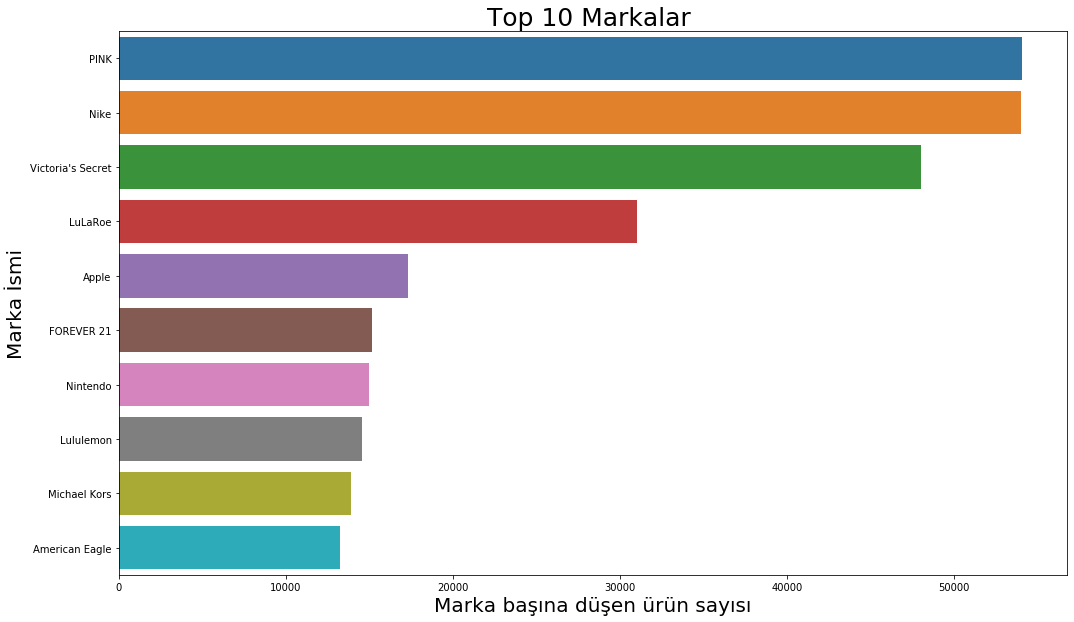

In [11]:
plt.figure(figsize=(17,10))
sns.countplot(y = train.brand_name, \
              order = train.brand_name.value_counts().iloc[:10].index, \
                                                      orient = 'v')
plt.title('Top 10 Markalar ', fontsize = 25)
plt.ylabel('Marka İsmi', fontsize = 20)
plt.xlabel('Marka başına düşen ürün sayısı', fontsize = 20)

In [13]:
train.brand_name.value_counts()

PINK                 54088
Nike                 54043
Victoria's Secret    48036
LuLaRoe              31024
Apple                17322
                     ...  
Dubble Bubble            1
Rasco FR                 1
Simms                    1
Magazine                 1
Com                      1
Name: brand_name, Length: 4809, dtype: int64

Text(0.5, 0, 'Ortalama Fiyat($)')

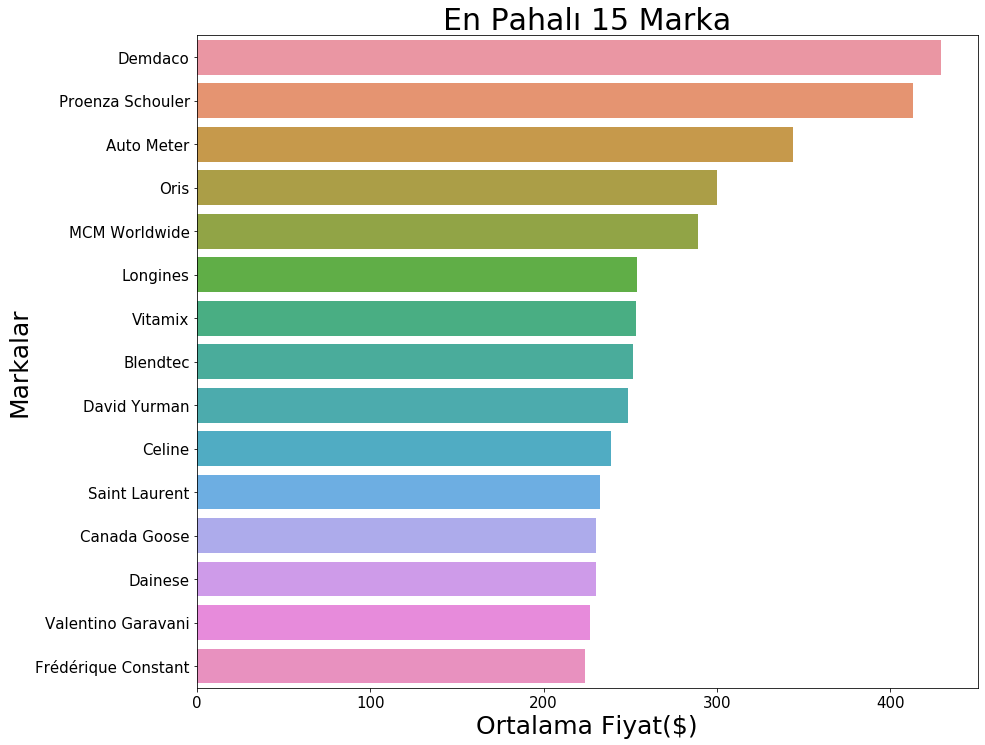

In [61]:
group = train.groupby (train.brand_name)
ranking = pd.DataFrame(group.price.mean())
ranking.reset_index(level = 0, inplace=True)
ranking = ranking.sort_values(by='price', ascending = False).head(15)

plt.figure(figsize=(14,12))
sns.barplot(x = 'price', y = 'brand_name', data = ranking, orient = 'h')
plt.title('En Pahalı 15 Marka', fontsize = 30)
plt.ylabel('Markalar', fontsize = 25)
plt.xlabel('Ortalama Fiyat($)', fontsize = 25)

(0.0, 100.0, 0.0, 100.0)

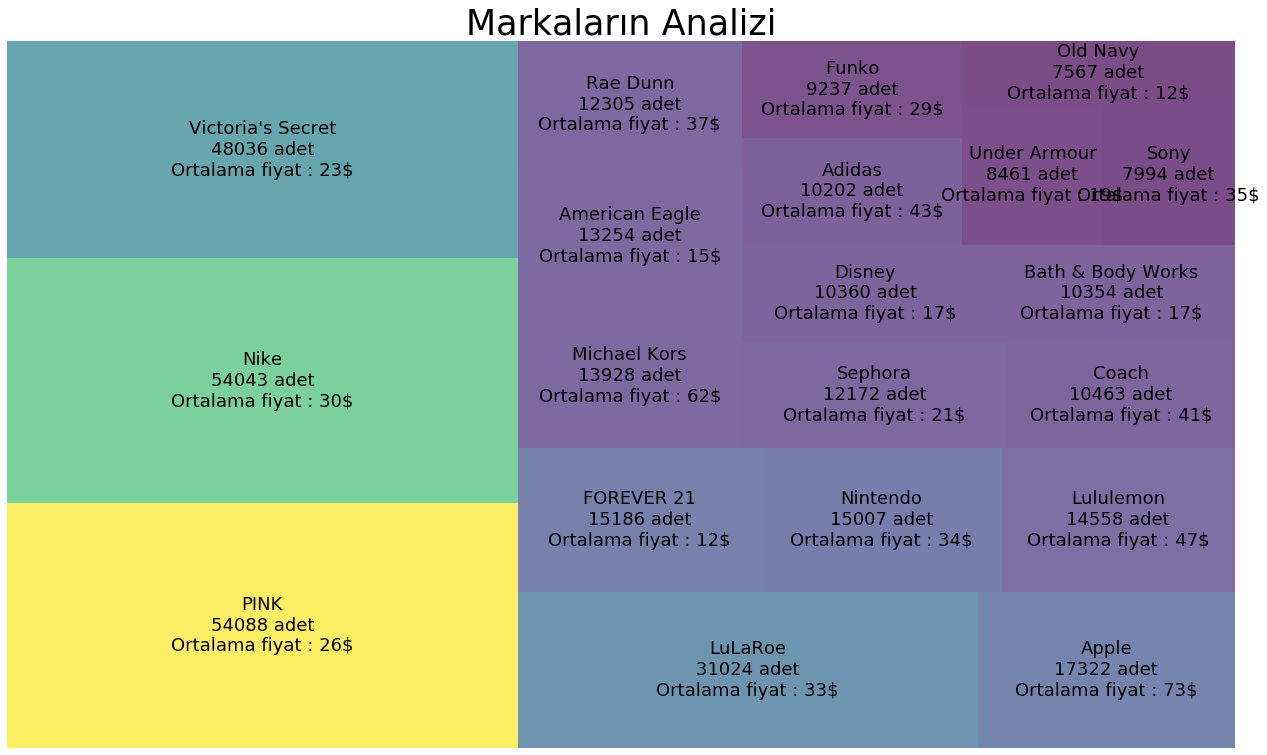

In [64]:
# Ürün sayısına göre markalar
brands = pd.DataFrame(train.brand_name.value_counts())
brands.reset_index(level = 0, inplace=True)
brands = brands.sort_values(by='brand_name', ascending = False).head(20)
brands.columns = ('brand_name', 'number_of_item')

# Fiyata göre markalar
group = train.groupby (train.brand_name)
brands_prices = pd.DataFrame(group.price.mean())
brands_prices.reset_index(level = 0, inplace=True)

# Birleştirme
brands = pd.merge(brands, brands_prices, how = 'left', on = 'brand_name')


labels = ["%s\n%d adet\nOrtalama fiyat : %d$" % (label) \
          for label in zip(brands['brand_name'], brands['number_of_item'], brands['price'])]


plt.figure(figsize=(22,13))
plt.rc('font', size=18)
squarify.plot(sizes = brands['number_of_item'], label = labels, alpha = .7, color=colors)
plt.title('Markaların Analizi', fontsize = 35)
plt.axis('off')

In [65]:
#Fiyat analizi
pd.options.display.float_format = '{:.2f}'.format
train.price.describe()

count   1482535.00
mean         26.74
std          38.59
min           0.00
25%          10.00
50%          17.00
75%          29.00
max        2009.00
Name: price, dtype: float64

Text(0.5, 1.0, 'Fiyat Dağılımı')

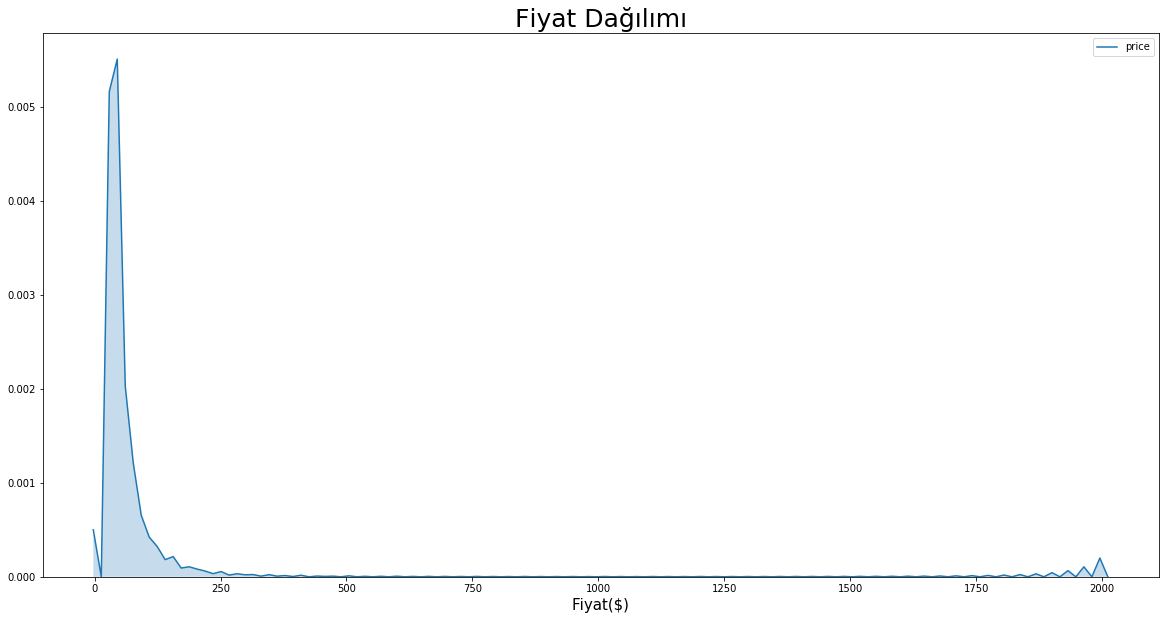

In [14]:
plt.figure(figsize=(20,10))
sns.kdeplot(train.price, shade = True)
plt.xlabel('Fiyat($)',fontsize=15)
plt.title('Fiyat Dağılımı', fontsize =25)

In [41]:
train.price.value_counts()

10.0      99416
12.0      78986
14.0      76655
16.0      66413
9.0       63643
          ...  
1150.0        1
31.5          1
45.5          1
727.0         1
378.0         1
Name: price, Length: 828, dtype: int64

In [36]:
f = train.price[train.price == 0].count()
print (f, 'ürünün fiyatı 0$.')

874 ürünün fiyatı 0$.


In [82]:
#Neden 0$ fiyatlandırıldığını bilmiyorum.

C:\Users\umitcan\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


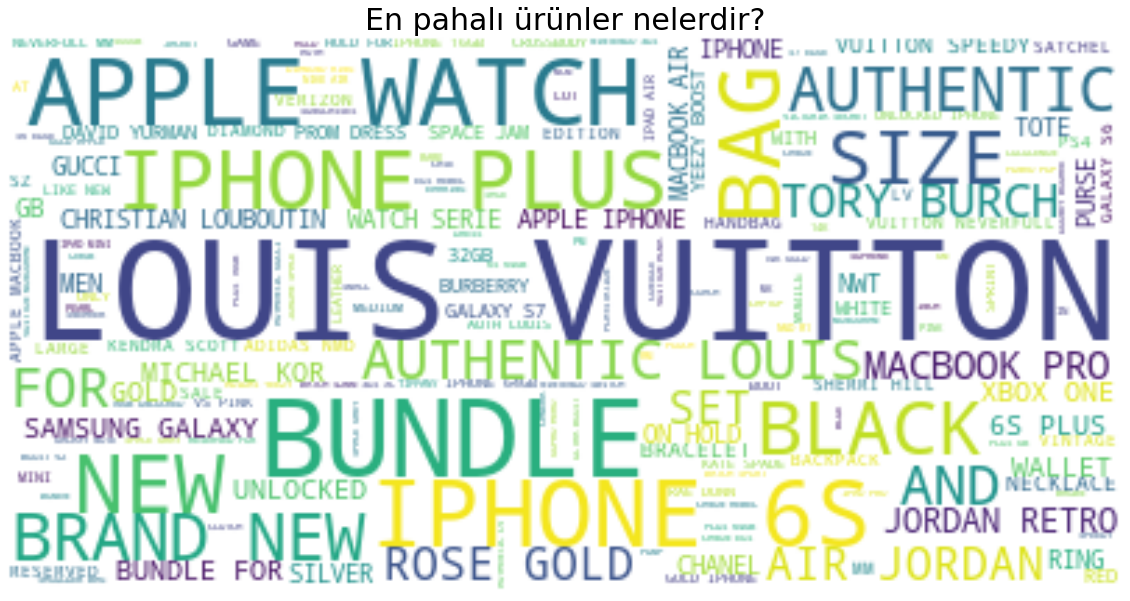

In [83]:
exp = train[train['price'] > 200]
exp.name = exp.name.str.upper()

wc = WordCloud(background_color="white", max_words=5000, 
               stopwords=STOPWORDS, max_font_size= 50)

wc.generate(" ".join(str(s) for s in exp.name.values))

plt.figure(figsize=(20,12))
plt.title('En pahalı ürünler nelerdir?', fontsize = 30)
plt.axis('off')
plt.imshow(wc, interpolation='bilinear')

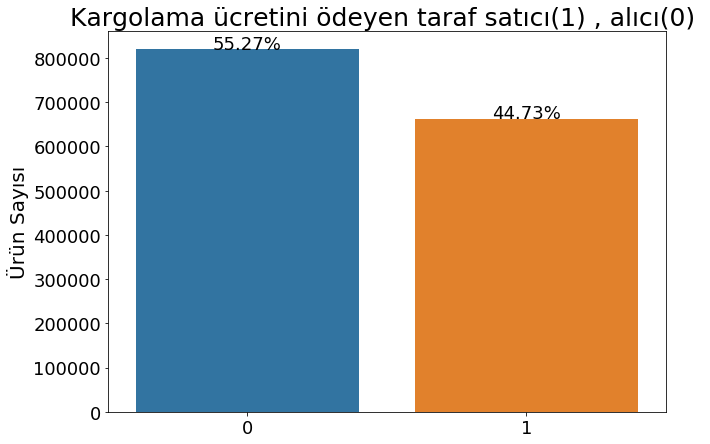

In [85]:
total = float(len(train.shipping))

plt.figure(figsize=(10,7))
ax = sns.countplot(train.shipping)
plt.title('Kargolama ücretini ödeyen taraf satıcı(1) , alıcı(0) ', fontsize = 25)
plt.ylabel('Ürün Sayısı', fontsize = 20)
plt.xlabel('')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:.2f}%'.format((height/total)*100),
            ha="center") 

In [43]:
train.shipping.value_counts()

0    819435
1    663100
Name: shipping, dtype: int64

In [88]:
train['no_descrip'] = 0
train.loc[train.item_description=='No description yet', 'no_descrip'] = 1
i = str(round(train['no_descrip'].value_counts(normalize=True).iloc[1] * 100,2)) + '%'

print('Ürünlerin' ,i, 'sının  ürün açıklama kısmı  yoktur.')

Ürünlerin 5.56% sının  ürün açıklama kısmı  yoktur.


Text(0.5, 1.0, 'En çok kullanılan kelimeler')

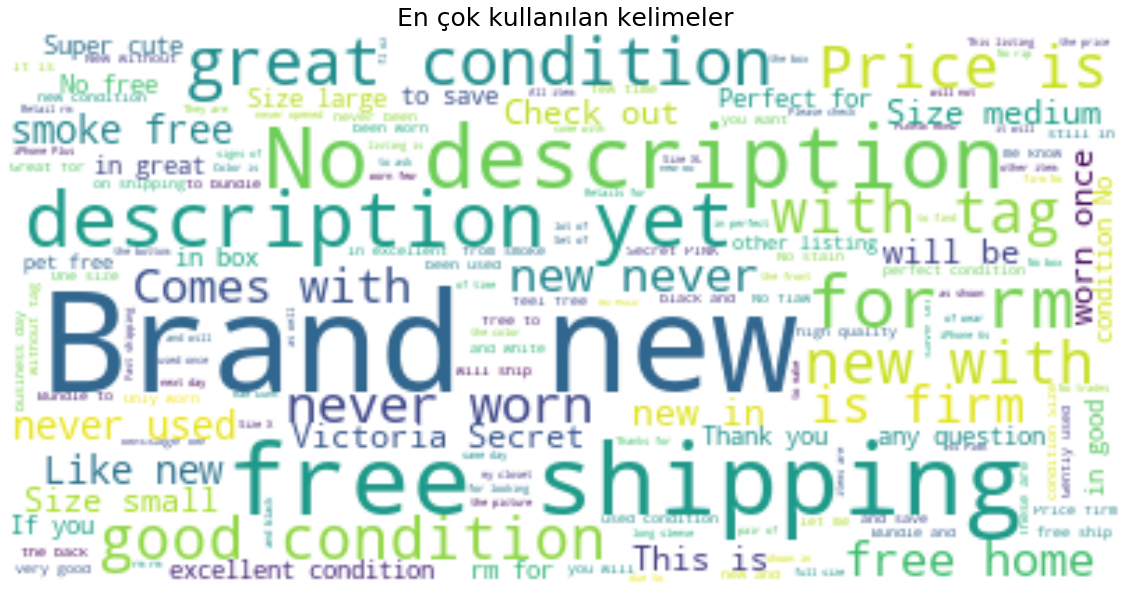

In [89]:
wc = WordCloud(background_color="white", max_words=5000, 
               stopwords=STOPWORDS, max_font_size= 50)

wc.generate(" ".join(str(s) for s in train.item_description.values))

plt.figure(figsize=(20,12))
plt.axis('off')
plt.imshow(wc, interpolation='bilinear')
plt.title('En çok kullanılan kelimeler',fontsize=25)

In [91]:
#Üst tarafta not description yet'leri temizlemediğimiz için böyle çıkıyor.

 # XGBoost

In [92]:
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import lightgbm as lgbm
from sklearn.metrics import mean_squared_error
from scipy import sparse as ssp
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.pipeline import FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [93]:
df_train = pd.read_csv('shop.tsv', sep='\t')

Y_train=np.log1p(df_train.price);
Id_train=df_train.train_id
X_train=df_train[['name','item_condition_id','category_name','brand_name','shipping','item_description']];

df_test = pd.read_csv('shoptest.tsv', sep='\t')

X_test=df_test[['name','item_condition_id','category_name','brand_name','shipping','item_description']];
del df_train

In [94]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 6 columns):
name                 1482535 non-null object
item_condition_id    1482535 non-null int64
category_name        1476208 non-null object
brand_name           849853 non-null object
shipping             1482535 non-null int64
item_description     1482531 non-null object
dtypes: int64(2), object(4)
memory usage: 67.9+ MB


In [95]:
def split_cat(text):
    try: return text.split("/")
    except: return ("No Label", "No Label", "No Label")

In [96]:
def convert_features(X):
    X['category_name'].fillna('other  / other / other', inplace=True)
    X['item_description'].fillna('No description yet', inplace=True)
    X['general_cat'], X['subcat_1'], X['subcat_2'] = \
    zip(*X['category_name'].apply(lambda x: split_cat(x)))
    del X['category_name']
    X.brand_name.replace(np.nan,value='Noname',inplace=True)
    Y=X
    return Y

X_train_converted=convert_features(X_train.copy())
X_test_converted=convert_features(X_test.copy())

X_train_converted.head()


ready_features=["item_condition_id","shipping"]
cat_features=['brand_name','general_cat','subcat_1','subcat_2']
train_len=len(X_train_converted)
all_data_categorials=pd.concat([X_train_converted[cat_features],X_test_converted[cat_features]],axis=0)


for column in cat_features:
    all_data_categorials[column]  = pd.Categorical(all_data_categorials[column]).codes

all_data_dummies=all_data_categorials;
del all_data_categorials;


In [97]:
X_train_dummies = all_data_dummies[:train_len]

X_test_dummies =  all_data_dummies[train_len:]

X_train_processed=result = pd.concat([X_train_converted[ready_features], X_train_dummies], axis=1)
X_test_processed=pd.concat([X_test_converted[ready_features],X_test_dummies], axis=1)
 
X_train_processed.info()
X_test_processed.info()

X_train_processed.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 6 columns):
item_condition_id    1482535 non-null int64
shipping             1482535 non-null int64
brand_name           1482535 non-null int16
general_cat          1482535 non-null int8
subcat_1             1482535 non-null int8
subcat_2             1482535 non-null int16
dtypes: int16(2), int64(2), int8(2)
memory usage: 31.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693359 entries, 0 to 693358
Data columns (total 6 columns):
item_condition_id    693359 non-null int64
shipping             693359 non-null int64
brand_name           693359 non-null int16
general_cat          693359 non-null int8
subcat_1             693359 non-null int8
subcat_2             693359 non-null int16
dtypes: int16(2), int64(2), int8(2)
memory usage: 14.5 MB


,item_condition_id,shipping,brand_name,general_cat,subcat_1,subcat_2
0,3,1,3361,5,103,774
1,3,0,3890,1,31,216
2,1,1,4589,9,104,98
3,1,1,3361,3,56,411
4,1,0,3361,9,59,543


In [99]:
train_X, valid_X, train_y, valid_y = train_test_split(X_train_processed, Y_train, test_size = 0.15, random_state = 201) 
print('Veriyi test ve eğitim olarak ayırdığımız bittiğinde ekrana yazdır')

Veriyi test ve eğitim olarak ayırdığımız bittiğinde ekrana yazdır


In [101]:
import lightgbm as lgb
import xgboost as xgb


import time
import re
import collections
import gc

In [102]:
data_train = xgb.DMatrix(train_X, label=train_y)
data_valid = xgb.DMatrix(valid_X, label=valid_y)

 
watchlist = [(data_train, 'train'), (data_valid, 'valid')]

xgb_params = {'min_child_weight': 20,
              'eta': 0.013,
              'colsample_bytree': 0.45,
              'max_depth': 16,
            'subsample': 0.88,
              'lambda': 2.07,
              'nthread': 4,
              'booster' :
              'gbtree',
              'silent': 1,
            'eval_metric': 'rmse',
              'objective': 'reg:linear'}

model_xgb = xgb.train(xgb_params, data_train, 2000, watchlist, early_stopping_rounds=20, verbose_eval=10)

C:\Users\umitcan\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	train-rmse:2.55824	valid-rmse:2.55881
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 20 rounds.
[10]	train-rmse:2.26747	valid-rmse:2.268
[20]	train-rmse:2.01385	valid-rmse:2.01432
[30]	train-rmse:1.79479	valid-rmse:1.79523
[40]	train-rmse:1.60381	valid-rmse:1.60423
[50]	train-rmse:1.43962	valid-rmse:1.43999
[60]	train-rmse:1.29903	valid-rmse:1.29943
[70]	train-rmse:1.17708	valid-rmse:1.17746
[80]	train-rmse:1.07404	valid-rmse:1.07442
[90]	train-rmse:0.986921	valid-rmse:0.987326
[100]	train-rmse:0.914168	valid-rmse:0.914587
[110]	train-rmse:0.852188	valid-rmse:0.852626
[120]	train-rmse:0.800607	valid-rmse:0.801072
[130]	train-rmse:0.757883	valid-rmse:0.75839
[140]	train-rmse:0.723882	valid-rmse:0.724418
[150]	train-rmse:0.695366	valid-rmse:0.695955
[160]	train-rmse:0.672032	valid-rmse:0.672673
[170]	train-rmse:0.653009	valid-rmse:0.653708
[180]	train-rmse:0.638668	valid-rmse:0.639382
[190]	train-r

# Random Forest

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


import pandas as pd

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics
from sklearn.model_selection import train_test_split
pd.set_option('display.float_format', lambda x: '%.5f' % x)
from scipy.cluster import hierarchy as hc
import os
import numpy as np

In [2]:
types_dict_train = {'train_id': 'int64',
             'item_condition_id': 'int8',
             'price': 'float64',
             'shipping': 'int8'}

In [3]:
train = pd.read_csv('shop.tsv',delimiter='\t',low_memory=True,dtype=types_dict_train)

In [4]:
types_dict_test = {'test_id': 'int64',
             'item_condition_id': 'int8',
             'shipping': 'int8'}

In [5]:
test = pd.read_csv('shoptest.tsv',delimiter='\t',low_memory= True,dtype=types_dict_test)

In [6]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000): 
        with pd.option_context("display.max_columns", 1000): 
            display(df)

In [7]:
display_all(train.describe(include='all').transpose())

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
train_id,1482535.00000,NaN,NaN,NaN,741267.00000,427971.13500,0.00000,370633.50000,741267.00000,1111900.50000,1482534.00000
name,1482535,1225273,Bundle,2232,NaN,NaN,NaN,NaN,NaN,NaN,NaN
item_condition_id,1482535.00000,NaN,NaN,NaN,1.90738,0.90316,1.00000,1.00000,2.00000,3.00000,5.00000
category_name,1476208,1287,"Women/Athletic Apparel/Pants, Tights, Leggings",60177,NaN,NaN,NaN,NaN,NaN,NaN,NaN
brand_name,849853,4809,PINK,54088,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,1482535.00000,NaN,NaN,NaN,26.73752,38.58607,0.00000,10.00000,17.00000,29.00000,2009.00000
shipping,1482535.00000,NaN,NaN,NaN,0.44727,0.49721,0.00000,0.00000,0.00000,1.00000,1.00000
item_description,1482531,1281426,No description yet,82489,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
train.category_name = train.category_name.astype('category')
train.item_description = train.item_description.astype('category')

train.name = train.name.astype('category')
train.brand_name = train.brand_name.astype('category')

In [9]:
test.category_name = test.category_name.astype('category')
test.item_description = test.item_description.astype('category')

test.name = test.name.astype('category')
test.brand_name = test.brand_name.astype('category')

In [10]:
train = train.rename(columns = {'train_id':'id'})

In [11]:
train.head()

,id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.00000,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.00000,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.00000,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.00000,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.00000,0,Complete with certificate of authenticity


In [12]:
test = test.rename(columns = {'test_id':'id'})

In [13]:
train['is_train'] = 1
test['is_train'] = 0

In [14]:
train_test_combine = pd.concat([train.drop(['price'],axis =1),test],axis = 0)

In [15]:
train_test_combine.category_name = train_test_combine.category_name.astype('category')
train_test_combine.item_description = train_test_combine.item_description.astype('category')

train_test_combine.name = train_test_combine.name.astype('category')
train_test_combine.brand_name = train_test_combine.brand_name.astype('category')

In [16]:
train_test_combine = train_test_combine.drop(['item_description'],axis = 1)

In [17]:
train_test_combine.name = train_test_combine.name.cat.codes

In [18]:
train_test_combine.category_name = train_test_combine.category_name.cat.codes

In [19]:
train_test_combine.brand_name = train_test_combine.brand_name.cat.codes

In [20]:
train_test_combine.head()

,id,name,item_condition_id,category_name,brand_name,shipping,is_train
0,0,916335,3,829,-1,1,1
1,1,1292428,3,86,3889,0,1
2,2,131013,1,1277,4588,1,1
3,3,802671,1,503,-1,1,1
4,4,65051,1,1204,-1,0,1


In [21]:
df_test = train_test_combine.loc[train_test_combine['is_train']==0]
df_train = train_test_combine.loc[train_test_combine['is_train']==1]

In [22]:
df_test = df_test.drop(['is_train'],axis=1)

In [23]:
df_train = df_train.drop(['is_train'],axis=1)

In [24]:
df_test.shape,df_train.shape


((693359, 6), (1482535, 6))

In [25]:
df_train['price'] = train.price

In [26]:
df_train['price'] = df_train['price'].apply(lambda x: np.log(x) if x>0 else x)

In [27]:
df_train.head()

,id,name,item_condition_id,category_name,brand_name,shipping,price
0,0,916335,3,829,-1,1,2.30259
1,1,1292428,3,86,3889,0,3.95124
2,2,131013,1,1277,4588,1,2.30259
3,3,802671,1,503,-1,1,3.55535
4,4,65051,1,1204,-1,0,3.78419


In [28]:
x_train,y_train = df_train.drop(['price'],axis =1),df_train.price

In [29]:
m = RandomForestRegressor(n_jobs=-1,min_samples_leaf=3,n_estimators=200)
m.fit(x_train, y_train)
m.score(x_train,y_train)

0.7931837734283476

# Sinir Ağları 

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline 

import math

In [2]:
def rmsle(y, y_pred):
    assert len(y) == len(y_pred)
    to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
    return (sum(to_sum) * (1.0/len(y))) ** 0.5

In [3]:
train = pd.read_table("shop.tsv")
test = pd.read_table("shoptest.tsv")

In [4]:
def handle_missing(dataset):
    dataset.category_name.fillna(value="missing", inplace=True)
    dataset.brand_name.fillna(value="missing", inplace=True)
    dataset.item_description.fillna(value="missing", inplace=True)
    return (dataset)

train = handle_missing(train)
test = handle_missing(test)

In [5]:
le = LabelEncoder()

le.fit(np.hstack([train.category_name, test.category_name]))
train.category_name = le.transform(train.category_name)
test.category_name = le.transform(test.category_name)

le.fit(np.hstack([train.brand_name, test.brand_name]))
train.brand_name = le.transform(train.brand_name)
test.brand_name = le.transform(test.brand_name)
del le

In [6]:

from keras.preprocessing.text import Tokenizer
raw_text = np.hstack([train.item_description.str.lower(), train.name.str.lower()])


tok_raw = Tokenizer()
tok_raw.fit_on_texts(raw_text)


train["seq_item_description"] = tok_raw.texts_to_sequences(train.item_description.str.lower())
test["seq_item_description"] = tok_raw.texts_to_sequences(test.item_description.str.lower())
train["seq_name"] = tok_raw.texts_to_sequences(train.name.str.lower())
test["seq_name"] = tok_raw.texts_to_sequences(test.name.str.lower())
train.head(3)

Text to seq process...


Using TensorFlow backend.


   Fitting tokenizer...
   Transforming text to seq...


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,seq_item_description,seq_name
0,0,MLB Cincinnati Reds T Shirt Size XL,3,829,5265,10.0,1,No description yet,"[12, 68, 79]","[3852, 8823, 6896, 208, 84, 6, 155]"
1,1,Razer BlackWidow Chroma Keyboard,3,86,3889,52.0,0,This keyboard is in great condition and works ...,"[29, 2627, 10, 7, 39, 17, 1, 207, 51, 19, 1113...","[10760, 25565, 16369, 2627]"
2,2,AVA-VIV Blouse,1,1277,4588,10.0,1,Adorable top with a hint of lace and a key hol...,"[604, 60, 9, 4, 5347, 11, 192, 1, 4, 886, 1290...","[7634, 10563, 666]"


In [9]:
max_urunismi_seq = np.max([np.max(train.seq_name.apply(lambda x: len(x))), np.max(test.seq_name.apply(lambda x: len(x)))])
max_seq_urun_aciklamasi = np.max([np.max(train.seq_item_description.apply(lambda x: len(x)))
                                   , np.max(test.seq_item_description.apply(lambda x: len(x)))])
print("max ürün ismi seq "+str(max_urunismi_seq))
print("max ürün açıklaması seq "+str(max_seq_urun_aciklamasi))

max ürün ismi seq 17
max ürün açıklaması seq 269


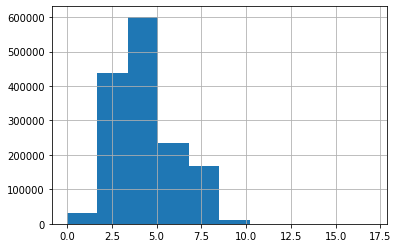

In [10]:
train.seq_name.apply(lambda x: len(x)).hist()

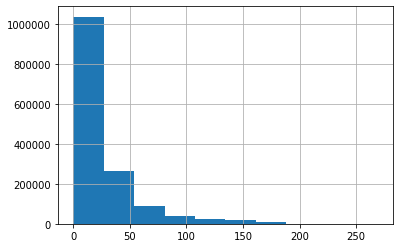

In [11]:
train.seq_item_description.apply(lambda x: len(x)).hist()

In [12]:
MAX_NAME_SEQ = 10
MAX_ITEM_DESC_SEQ = 75
MAX_TEXT = np.max([np.max(train.seq_name.max())
                   , np.max(test.seq_name.max())
                  , np.max(train.seq_item_description.max())
                  , np.max(test.seq_item_description.max())])+2
MAX_CATEGORY = np.max([train.category_name.max(), test.category_name.max()])+1
MAX_BRAND = np.max([train.brand_name.max(), test.brand_name.max()])+1
MAX_CONDITION = np.max([train.item_condition_id.max(), test.item_condition_id.max()])+1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025AC436F7C8>]],
      dtype=object)

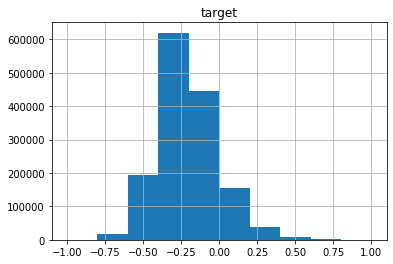

In [13]:
train["target"] = np.log(train.price+1)
target_scaler = MinMaxScaler(feature_range=(-1, 1))
train["target"] = target_scaler.fit_transform(train.target.values.reshape(-1,1))
pd.DataFrame(train.target).hist()

In [14]:
dtrain, dvalid = train_test_split(train, random_state=123, train_size=0.99)
print(dtrain.shape)
print(dvalid.shape)

(1467709, 11)
(14826, 11)


In [15]:
from keras.preprocessing.sequence import pad_sequences

def get_keras_data(dataset):
    X = {
        'name': pad_sequences(dataset.seq_name, maxlen=MAX_NAME_SEQ)
        ,'item_desc': pad_sequences(dataset.seq_item_description, maxlen=MAX_ITEM_DESC_SEQ)
        ,'brand_name': np.array(dataset.brand_name)
        ,'category_name': np.array(dataset.category_name)
        ,'item_condition': np.array(dataset.item_condition_id)
        ,'num_vars': np.array(dataset[["shipping"]])
    }
    return X

X_train = get_keras_data(dtrain)
X_valid = get_keras_data(dvalid)
X_test = get_keras_data(test)

In [16]:
from keras.layers import Input, Dropout, Dense, BatchNormalization, Activation, concatenate, GRU, Embedding, Flatten, BatchNormalization
from keras.models import Model
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras import backend as K

def get_callbacks(filepath, patience=2):
    es = EarlyStopping('val_loss', patience=patience, mode="min")
    msave = ModelCheckpoint(filepath, save_best_only=True)
    return [es, msave]

def rmsle_cust(y_true, y_pred):
    first_log = K.log(K.clip(y_pred, K.epsilon(), None) + 1.)
    second_log = K.log(K.clip(y_true, K.epsilon(), None) + 1.)
    return K.sqrt(K.mean(K.square(first_log - second_log), axis=-1))

def get_model():
    
    dr_r = 0.1
    
    
    name = Input(shape=[X_train["name"].shape[1]], name="name")
    item_desc = Input(shape=[X_train["item_desc"].shape[1]], name="item_desc")
    brand_name = Input(shape=[1], name="brand_name")
    category_name = Input(shape=[1], name="category_name")
    item_condition = Input(shape=[1], name="item_condition")
    num_vars = Input(shape=[X_train["num_vars"].shape[1]], name="num_vars")
    
    emb_name = Embedding(MAX_TEXT, 50)(name)
    emb_item_desc = Embedding(MAX_TEXT, 50)(item_desc)
    emb_brand_name = Embedding(MAX_BRAND, 10)(brand_name)
    emb_category_name = Embedding(MAX_CATEGORY, 10)(category_name)
    emb_item_condition = Embedding(MAX_CONDITION, 5)(item_condition)
    
    
    rnn_layer1 = GRU(16) (emb_item_desc)
    rnn_layer2 = GRU(8) (emb_name)
    
    
    main_l = concatenate([
        Flatten() (emb_brand_name)
        , Flatten() (emb_category_name)
        , Flatten() (emb_item_condition)
        , rnn_layer1
        , rnn_layer2
        , num_vars
    ])
    main_l = Dropout(dr_r) (Dense(128) (main_l))
    main_l = Dropout(dr_r) (Dense(64) (main_l))
    
    
    output = Dense(1, activation="linear") (main_l)
    
    
    model = Model([name, item_desc, brand_name
                   , category_name, item_condition, num_vars], output)
    model.compile(loss="mse", optimizer="adam", metrics=["mae", rmsle_cust])
    
    return model

    
model = get_model()
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
brand_name (InputLayer)         (None, 1)            0                                            
__________________________________________________________________________________________________
category_name (InputLayer)      (None, 1)            0                                            
__________________________________________________________________________________________________
item_condition (InputLayer)     (None, 1)            0                                            
__________________________________________________________________________________________________
item_desc (InputLayer)          (None, 75)           0                                            
____________________________________________________________________________________________

In [17]:
BATCH_SIZE = 20000
epochs = 5

model = get_model()
model.fit(X_train, dtrain.target, epochs=epochs, batch_size=BATCH_SIZE
          , validation_data=(X_valid, dvalid.target)
          , verbose=1)

C:\Users\umitcan\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 1467709 samples, validate on 14826 samples
Epoch 1/5
1467709/1467709 [==============================] - 445s 303us/step - loss: 0.0328 - mae: 0.1367 - rmsle_cust: 0.0168 - val_loss: 0.0189 - val_mae: 0.1040 - val_rmsle_cust: 0.0138
Epoch 2/5
1467709/1467709 [==============================] - 318s 216us/step - loss: 0.0188 - mae: 0.1039 - rmsle_cust: 0.0135 - val_loss: 0.0165 - val_mae: 0.0972 - val_rmsle_cust: 0.0129
Epoch 3/5
1467709/1467709 [==============================] - 318s 217us/step - loss: 0.0165 - mae: 0.0974 - rmsle_cust: 0.0127 - val_loss: 0.0156 - val_mae: 0.0951 - val_rmsle_cust: 0.0125
Epoch 4/5
1467709/1467709 [==============================] - 319s 217us/step - loss: 0.0152 - mae: 0.0934 - rmsle_cust: 0.0123 - val_loss: 0.0153 - val_mae: 0.0941 - val_rmsle_cust: 0.0124
Epoch 5/5
1467709/1467709 [==============================] - 317s 216us/step - loss: 0.0144 - mae: 0.0909 - rmsle_cust: 0.0120 - val_loss: 0.0154 - val_mae: 0.0939 - val_rmsle_cust: 0.0124


In [18]:
val_preds = model.predict(X_valid)
val_preds = target_scaler.inverse_transform(val_preds)
val_preds = np.exp(val_preds)+1

In [19]:
y_true = np.array(dvalid.price.values)
y_pred = val_preds[:,0]
v_rmsle = rmsle(y_true, y_pred)
print(" RMSLE skorunu bul: "+str(v_rmsle))

 RMSLE skorunu bul: 0.481288973340424
